In [1]:
import pandas as pd
import os
trenutni_direktorij = os.getcwd()
parent_direktorij = os.path.dirname(trenutni_direktorij)
put_do_raw = os.path.join(parent_direktorij, "data", "raw")
csv_2020 = pd.read_csv(os.path.join(put_do_raw, "2020-08-19.csv"))

In [2]:
_26m_rewiews = pd.read_csv(os.path.join(put_do_raw, "bgg-26m-reviews.csv"))

In [3]:
_26m_rewiews.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,sidehacker,10.0,NaN,13,CATAN
1,1,Varthlokkur,10.0,NaN,13,CATAN
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,CATAN
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,CATAN
4,4,ssmooth,10.0,NaN,13,CATAN


In [4]:
_26m_rewiews.info()

<class 'pandas.DataFrame'>
RangeIndex: 26200012 entries, 0 to 26200011
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   user        str    
 2   rating      float64
 3   comment     str    
 4   ID          int64  
 5   name        str    
dtypes: float64(1), int64(2), str(3)
memory usage: 1.2 GB


In [5]:
_26m_rewiews["rating"].describe()

count    2.620001e+07
mean     7.127709e+00
std      1.587205e+00
min      1.401300e-45
25%      6.000000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

In [6]:
_26m_rewiews[_26m_rewiews["rating"] < 1] #Kikaj ove kraljeve (btw na bgg je stvarno uspia dat 0.1 za ocjenu npr)

,Unnamed: 0,user,rating,comment,ID,name
4674390,4674390,scrub64,1.000000e-01,NaN,1406,Monopoly
5965918,5965918,GeoffMack,1.401300e-45,Avoid this game. Unless you like unusual game...,42,Tigris & Euphrates
7020175,7020175,ilovekatusha,1.000000e-03,"I have really started to loath this game, I us...",18,RoboRally
13261377,13261377,Speedemon,5.000000e-01,how to start massive fights with your wife?,2281,Pictionary
14764139,14764139,alfredo lorente,1.000000e-04,"Utterly simple -- and simplistic -- game of ""t...",3699,Killer Bunnies and the Quest for the Magic Carrot
15209445,15209445,roseofarc,5.000000e-01,The absolute worst game I have ever played. Bo...,1897,The Starfarers of Catan
16510486,16510486,MarcMagus,1.000000e-01,NaN,11901,Tic-Tac-Toe
20320493,20320493,ticklerickle,1.000000e-01,Ugly presentation. Strategically boring. Sim...,3421,StreetSoccer
24305091,24305091,aaronphf,5.000000e-01,NaN,4062,Swap!
25045404,25045404,alfredo lorente,1.000000e-03,"Here we are, three years after [i]Battle of th...",9782,Battle of the Bands: Encore Edition


In [7]:
table = _26m_rewiews["user"].value_counts()

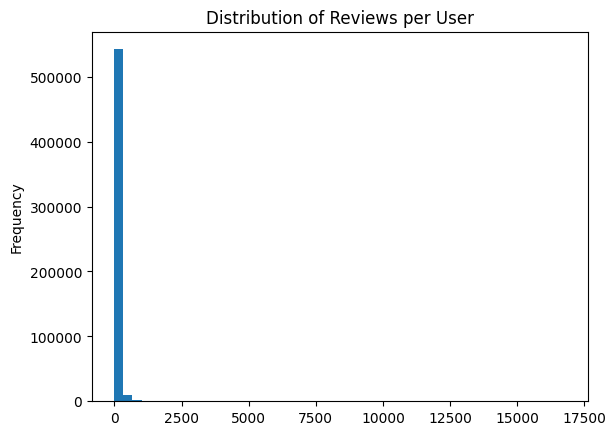

count    555481.000000
mean         47.166233
std         119.408271
min           1.000000
25%           2.000000
50%          11.000000
75%          43.000000
max       16792.000000
Name: count, dtype: float64

In [8]:
import matplotlib.pyplot as plt
table.plot(kind='hist', bins=50, title='Distribution of Reviews per User')
plt.show()

table.describe()

In [9]:
cuted_table = table[table > 42]

In [10]:
users = cuted_table.index.tolist()


In [11]:
table_games = _26m_rewiews["ID"].value_counts()

In [12]:
table_games.describe()

count     27865.000000
mean        940.248053
std        4192.676666
min          29.000000
25%          56.000000
50%         125.000000
75%         407.000000
max      131303.000000
Name: count, dtype: float64

In [13]:
cuted_table_games = table_games[table_games > 406]

In [14]:
games = cuted_table_games.index.tolist()

In [15]:
len(games)

6970

In [16]:
filtered_26m_reviews = _26m_rewiews[_26m_rewiews["user"].isin(users) & _26m_rewiews["ID"].isin(games)]

In [17]:
len(filtered_26m_reviews)/len(_26m_rewiews)

0.7599099954610707

In [18]:
import gc

del _26m_rewiews, csv_2020, cuted_table, cuted_table_games, table, table_games
gc.collect()

7721

In [19]:
filtered_26m_reviews.drop(columns=['Unnamed: 0','comment','name'], inplace=True)

In [20]:
games_info = pd.read_csv(os.path.join(put_do_raw, "games_detailed_info2025.csv"))

In [21]:
import data_prep
games_info.rename(columns={"id": "ID"}, inplace=True)
game_fetures = ["yearpublished_bin"]
data_preprocesor = data_prep.DataPreprocessor(games_info,filtered_26m_reviews)
games_info = data_preprocesor.discretize_column(games_info, "yearpublished", n_bins=10, drop_original=True)

In [22]:
data_preprocesor2 = data_prep.DataPreprocessor(games_info,filtered_26m_reviews)
games_merged = data_preprocesor2.merge_datasets(featires_to_add=game_fetures)

In [23]:
games_merged.head()

,user,rating,ID,yearpublished_bin
0,Varthlokkur,10.0,13,1
1,cypar7,10.0,13,1
2,ssmooth,10.0,13,1
3,hreimer,10.0,13,1
4,ericgorr,10.0,13,1


In [24]:
games_merged.to_csv("version1.csv", index=False)